1) Residual Diognostics:

Model development and residual calculation

In [6]:
# Book Figure 11-1

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt
import numpy as np


!wget -O FuelConsumption.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv
df = pd.read_csv("FuelConsumption.csv")
X = df[['CYLINDERS','ENGINESIZE','FUELCONSUMPTION_COMB_MPG']]

y = df[['CO2EMISSIONS']]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=4)
model=LinearRegression()
model.fit(X_train,y_train)
LinearRegression()
y_pred=model.predict(X_test)
residual =y_test-y_pred
# plt.scatter(y,X['FUELCONSUMPTION_COMB_MPG'])

residual.shape

--2023-12-31 03:43:49--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

FuelConsumption.csv 100%[===================>]  70.93K  --.-KB/s    in 0.04s   

2023-12-31 03:43:50 (1.89 MB/s) - ‘FuelConsumption.csv’ saved [72629/72629]



(214, 1)

Model paramters and metrics

In [ ]:
from sklearn.metrics import r2_score

print ('Slope: ', model.coef_)
print ('Intercept: ',model.intercept_)
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_test-y_pred)))
print("Mean sum of squares (MSE): %.2f" % np.mean((y_test-y_pred) ** 2))
print("R2-score: %.2f" % r2_score(y_test,y_pred) )

t and p values

In [ ]:
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

X2 = sm.add_constant(X_train)
est = sm.OLS(y_train, X2)
est2 = est.fit()
print(est2.summary())

Residual Mean

In [ ]:
plt.scatter(y_pred, residual)
plt.xlabel('y_pred')
plt.ylabel('residual')
print('Resdiual Mean:',np.mean(residual))

Residual vs IVs

In [ ]:
plt.scatter(X_test.ENGINESIZE, residual)
plt.xlabel('ENGINESIZE')
plt.ylabel('residual')
plt.show()

plt.scatter(X_test.CYLINDERS, residual)
plt.xlabel('CYLINDERS')
plt.ylabel('residual')
plt.show()


plt.scatter(X_test.FUELCONSUMPTION_COMB_MPG, residual)
plt.xlabel('FUELCONSUMPTION_COMB_MPG_2')
plt.ylabel('residual')

Residual vs DV

In [ ]:
plt.scatter(y_pred, residual)
plt.xlabel('y_pred')
plt.ylabel('residual')

Noramlity of residuals

In [ ]:
# Book Figure 11-8

import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from scipy.stats import shapiro, kstest
import matplotlib.pyplot as plot

p = sns.distplot(residual,kde=True)
plot.xlabel('X')
sm.qqplot(df['CO2EMISSIONS'], line='s')
shapiro(residual)
# kstest(residual, "norm") # KS test good for sample number>2000

Residual Autocorrelation

In [ ]:
# Book Figure 11-14

import statsmodels.api as sm
from statsmodels.stats.stattools import durbin_watson
import statsmodels.api as sm
import matplotlib.pyplot as plot

plot.figure(figsize=(10,5))
p = sns.lineplot(residual,marker='o',color='blue')
plot.xlabel('y_pred/predicted values')
plot.ylabel('Residuals')
print('ljungbox stat:', sm.stats.acorr_ljungbox(residual, lags=[40], return_df=True))
dw_statistic = durbin_watson(residual)
print('Durbin-Watson stat:',dw_statistic)
if dw_statistic < 1.5:
    print("The residuals are negatively correlated.")
elif dw_statistic > 2.5:
    print("The residuals are positively correlated.")
else:
    print("The residuals are not correlated.")
sm.graphics.tsa.plot_acf(residual, lags=40)
plot.xlabel('Lag')
plot.ylabel('Correlation')
plot.show()
sm.graphics.tsa.plot_pacf(residual, lags=40)
plot.xlabel('Lag')
plot.ylabel('Correlation')
plot.show()

Influencial data

In [ ]:
import statsmodels.api as sm

filename = "https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data"

headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
"drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
"num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
"peak-rpm","city-mpg","highway-mpg","price"]

df = pd.read_csv(filename, names = headers)

df = df.loc[:, ['symboling', 'wheel-base', 'engine-size', 'bore', 'stroke',
'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
'highway-mpg', 'price']]
df = df.replace('?', np.nan)
df = df.dropna()
df.reset_index(drop = True, inplace = True)

#define response variable
y = df['price']

#define explanatory variable
x = df[['symboling', 'wheel-base', 'engine-size', 'bore', 'stroke',
'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
'highway-mpg']]

import statsmodels.api as sm

#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y.astype(float), x.astype(float)).fit()

import numpy as np
np.set_printoptions(suppress=True)

#create instance of influence
influence = model.get_influence()
cooks = influence.cooks_distance

# Draw plot
plt.figure(figsize = (12, 8))
plt.scatter(df.index, cooks[0])
plt.plot(df.index, cooks[0], color='black')
plt.xlabel('Row Number', fontsize = 12)
plt.ylabel('Cooks Distance', fontsize = 12)
plt.title('Influencial Points', fontsize = 22)
plt.show()

Remedy

In [ ]:
X ['FUELCONSUMPTION_COMB_MPG_2']= X['FUELCONSUMPTION_COMB_MPG']**2
X ['FUELCONSUMPTION_COMB_MPG_2']= np.log(X['FUELCONSUMPTION_COMB_MPG'])



2) Multicolinearity:

Variable correlation

<Axes: xlabel='FUELCONSUMPTION_COMB_MPG', ylabel='ENGINESIZE'>

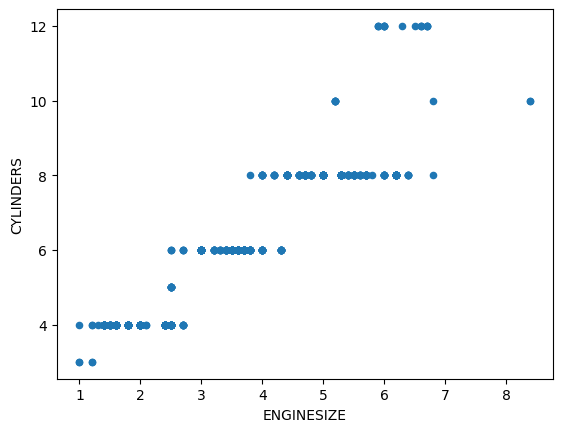

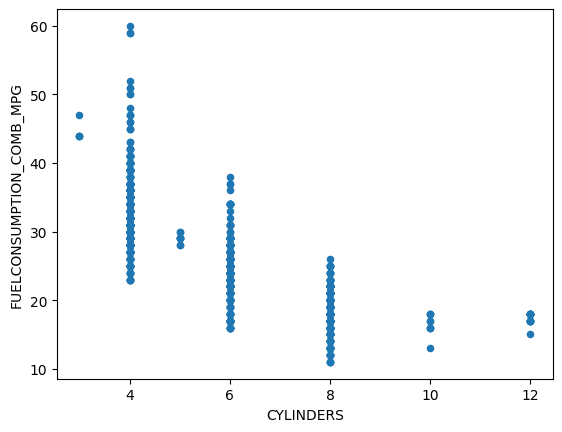

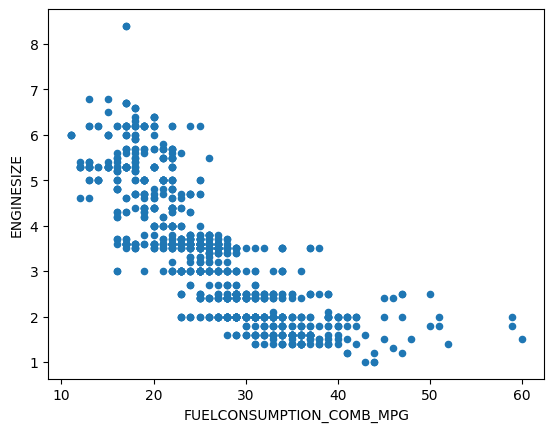

In [ ]:
# Book Figure 11-5

import matplotlib.pyplot as plot
df.plot.scatter(x='ENGINESIZE', y='CYLINDERS')
df.plot.scatter(x='CYLINDERS', y='FUELCONSUMPTION_COMB_MPG')
df.plot.scatter(x='FUELCONSUMPTION_COMB_MPG', y='ENGINESIZE')

Pair Plot

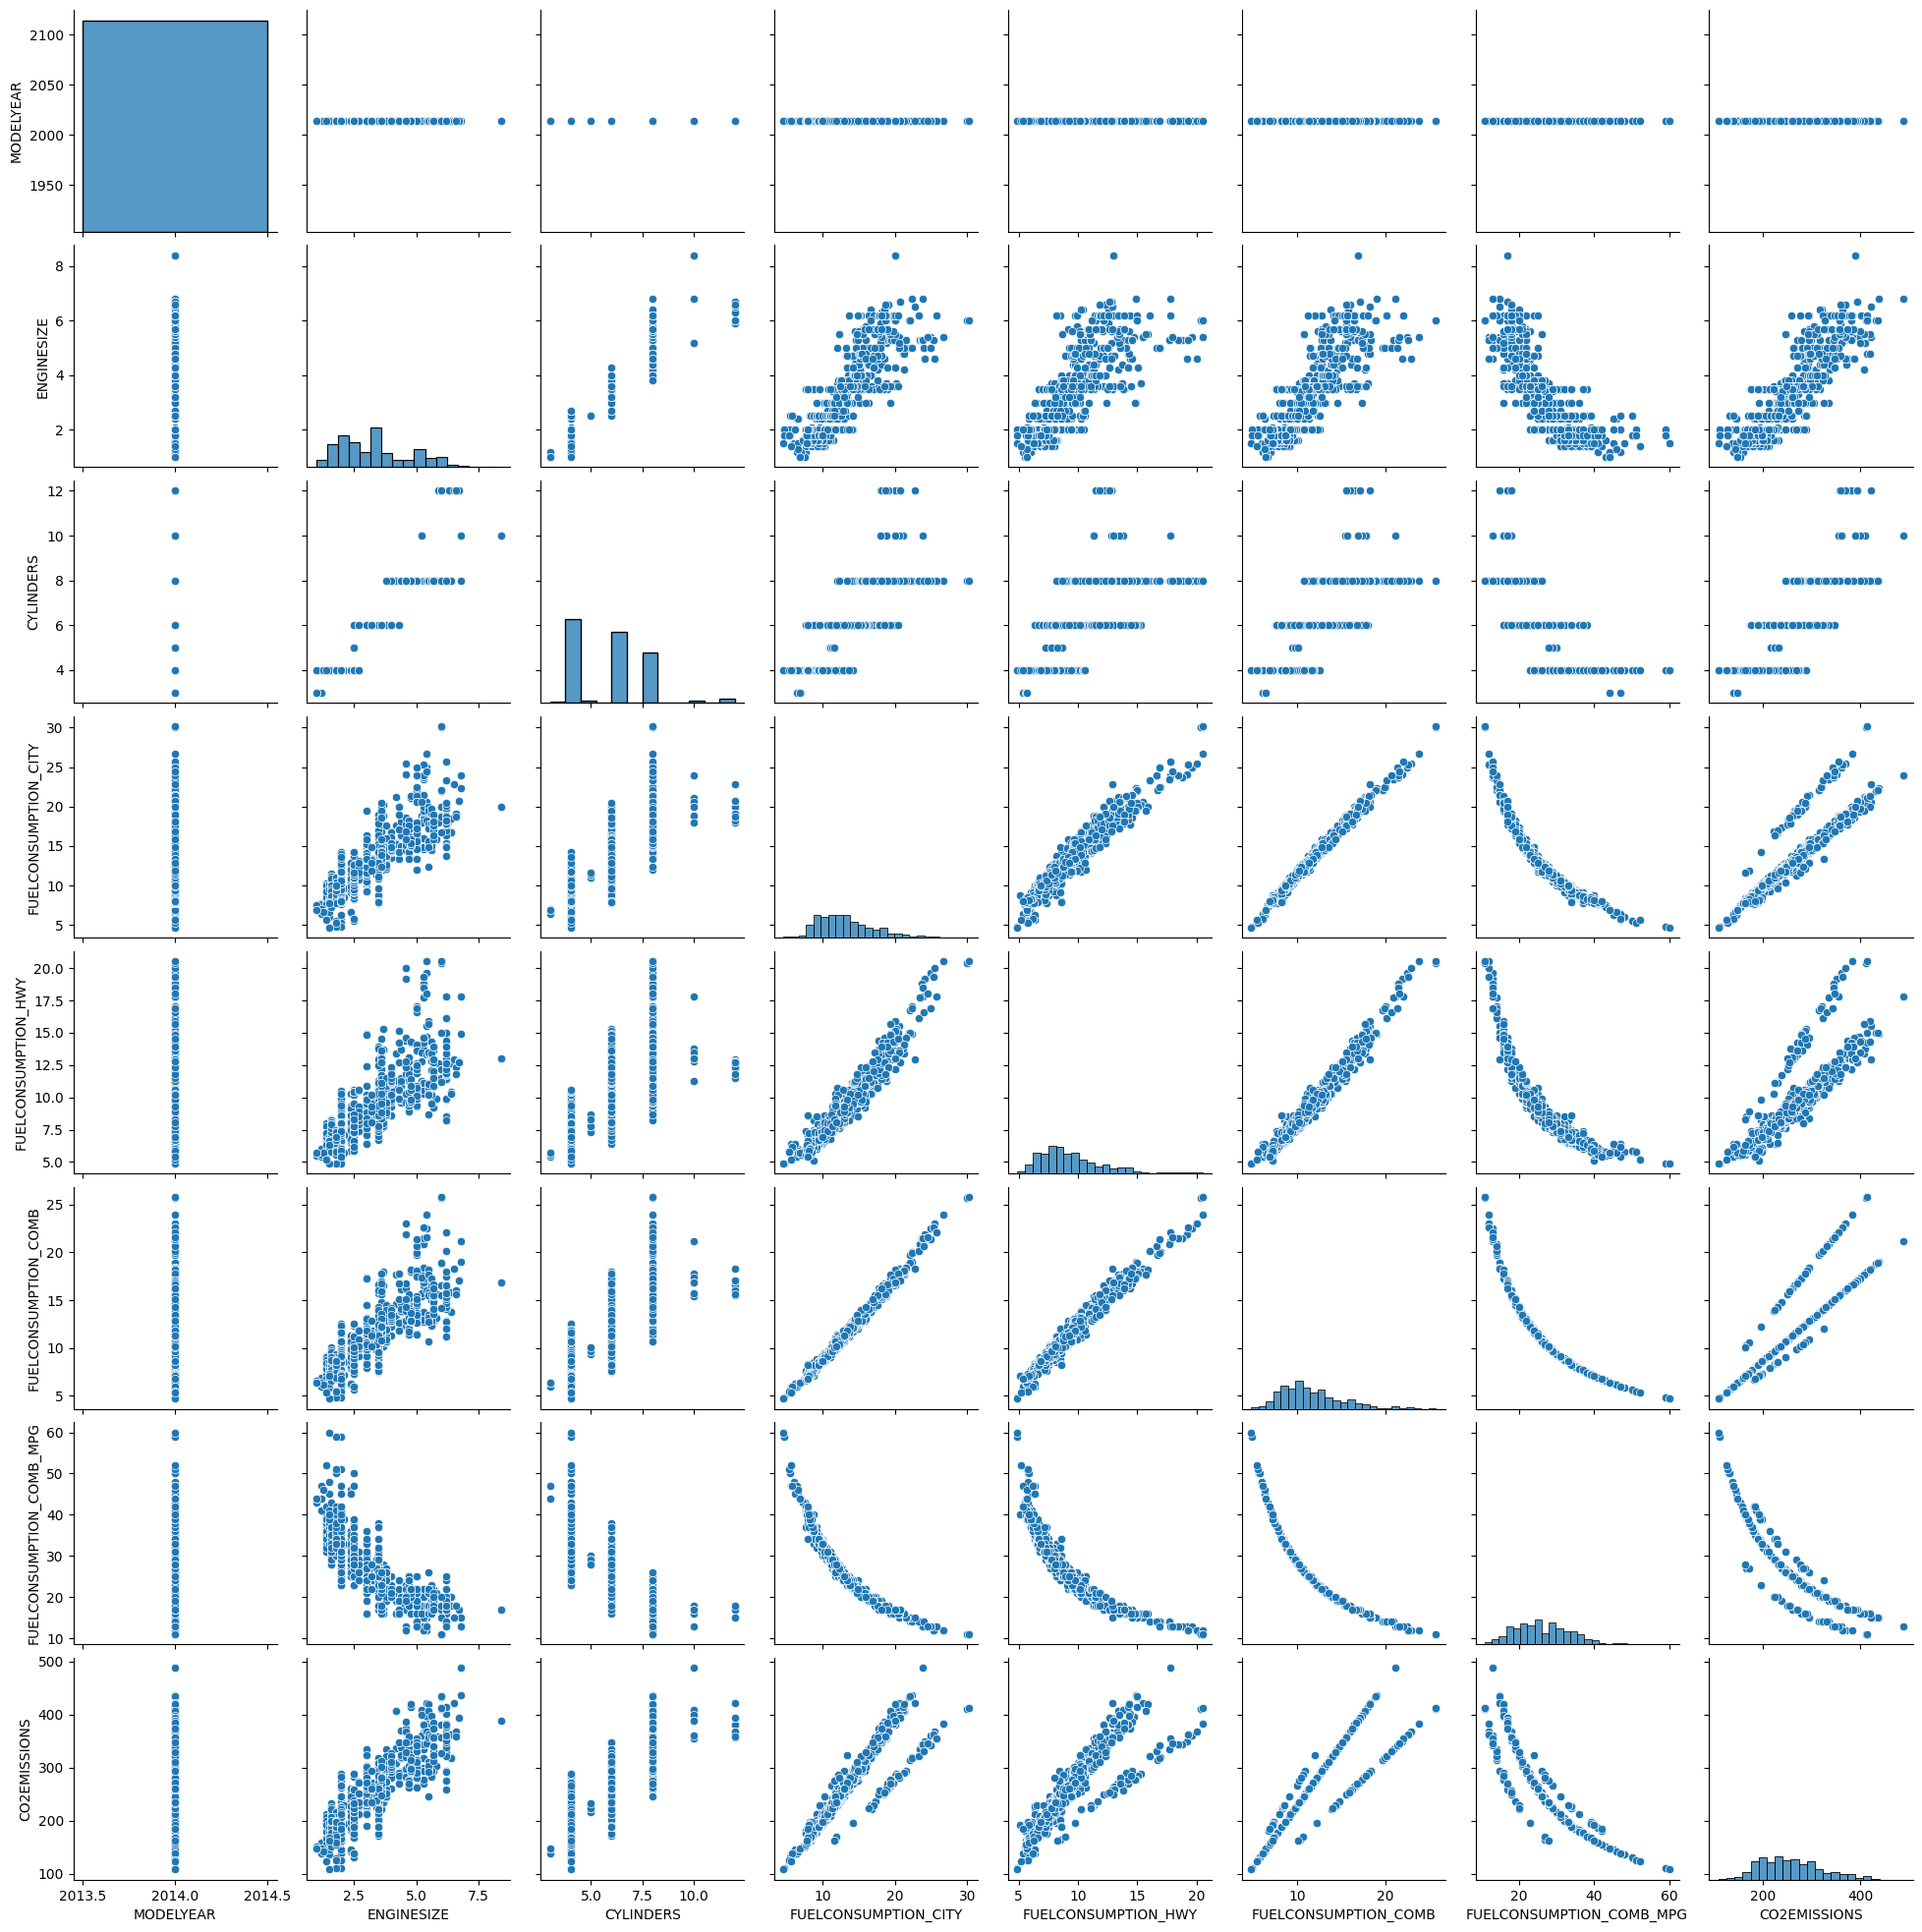

In [ ]:
import seaborn as sns

sns.pairplot(df)
plt.show()

# pd.plotting.scatter_matrix(df, diagonal="hist", alpha=0.5)


Correlation Coefficient

<ipython-input-39-e72e8d13f176>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

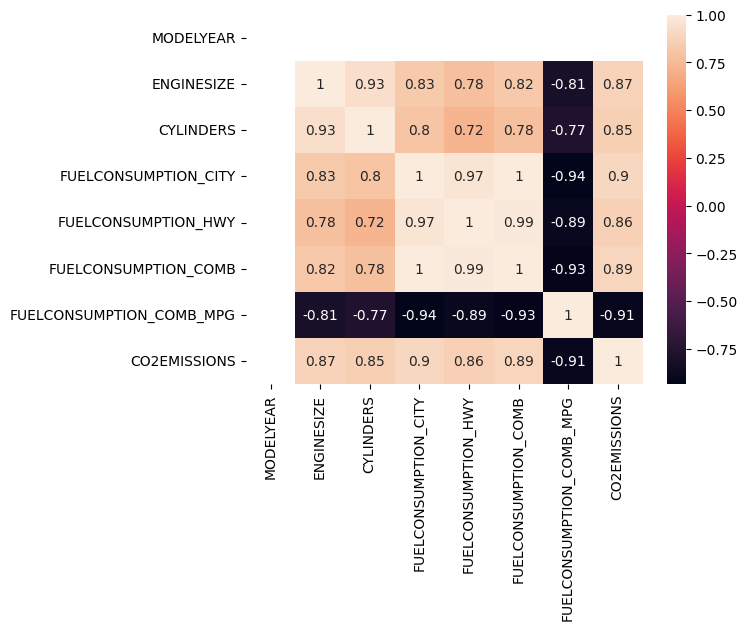

In [ ]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True)
# sns.heatmap(X.iloc[:,0:3].corr(),annot=True)

VIF

In [ ]:
# Book Figure 11-7

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=[]
for i in range (X_train.shape[1]):
  vif.append(variance_inflation_factor(X_train, i))
pd.DataFrame({'vif':vif}, index=X.columns[0:3]).T
print('VIF of [ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB_MPG]:', vif)


VIF of [ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB_MPG]: [39.639664419860445, 39.639664419860445]


Remedy - Remove IVs


In [ ]:
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

X2 = sm.add_constant(X_train)
est = sm.OLS(y_train, X2)
est2 = est.fit()
print(est2.summary())



                            OLS Regression Results                            
Dep. Variable:           CO2EMISSIONS   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     1355.
Date:                Tue, 26 Dec 2023   Prob (F-statistic):          4.51e-265
Time:                        05:32:24   Log-Likelihood:                -4146.1
No. Observations:                 853   AIC:                             8298.
Df Residuals:                     850   BIC:                             8312.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        107.9202      4.135     26.100      0.0

In [ ]:
X = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB_MPG']]
# X['EF']=X['ENGINESIZE']*X['FUELCONSUMPTION_COMB_MPG']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=4)
model=LinearRegression()
model.fit(X_train,y_train)

X2 = sm.add_constant(X_train)
est = sm.OLS(y_train, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:           CO2EMISSIONS   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.878
Method:                 Least Squares   F-statistic:                     2040.
Date:                Tue, 26 Dec 2023   Prob (F-statistic):               0.00
Time:                        04:07:47   Log-Likelihood:                -3859.0
No. Observations:                 853   AIC:                             7726.
Df Residuals:                     849   BIC:                             7745.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

3) Heteroscedasticity:

Simulated data

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Set the random seed for reproducibility
np.random.seed(0)

# Simulate independent variable (x)
x = np.linspace(1, 50, 100)

# Simulate dependent variable (y) with increasing variance
y = 2 * x + np.random.normal(loc=0, scale=0.5 + 0.05 * x)

# Visualize the heteroscedasticity in the data
plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.6)
plt.title("Simulated Data with Heteroscedasticity")
plt.xlabel("Independent variable (x)")
plt.ylabel("Dependent variable (y)")
plt.show()

Real data

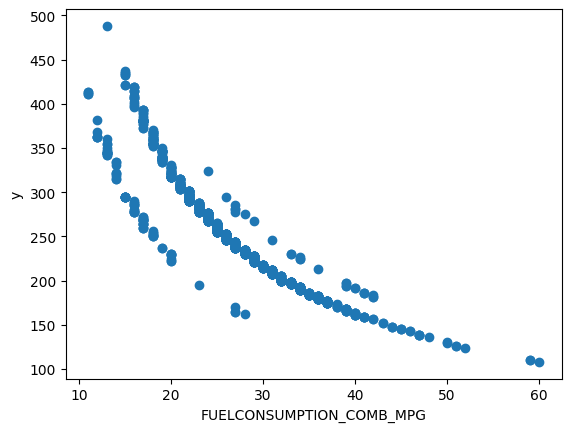

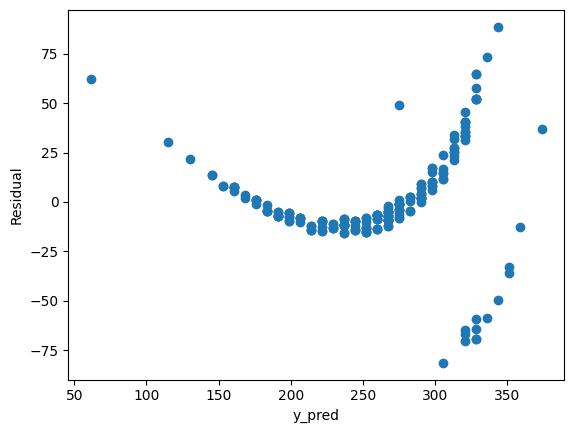

In [10]:
import matplotlib.pyplot as plot
import statsmodels.api as sm

# X = df[['CYLINDERS','ENGINESIZE','FUELCONSUMPTION_COMB_MPG']]
X = df[['FUELCONSUMPTION_COMB_MPG']]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=4)
model=LinearRegression()
model.fit(X_train,y_train)
LinearRegression()
y_pred=model.predict(X_test)
residual =y_test-y_pred

plot.scatter(X['FUELCONSUMPTION_COMB_MPG'], y)
plot.xlabel('FUELCONSUMPTION_COMB_MPG')
plot.ylabel('y')
plot.show()

plot.scatter(y_pred,residual)
plot.xlabel('y_pred')
plot.ylabel('Residual')
plot.show()



Goldfeldquandt

In [18]:
# Book Figure 11-13

import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(y_pred, y_test)
print ('Goldfeld-Quandt:', lzip(name, test))


Goldfeld-Quandt: [('F statistic', 0.9948004083761114), ('p-value', 0.5106796588093054)]


Breusch Pagan

In [19]:
import numpy as np
import pandas as pd
from statsmodels.formula.api import ols
from statsmodels.stats.diagnostic import het_breuschpagan

# Fit a multiple linear regression model
model = ols('CO2EMISSIONS ~ ENGINESIZE+CYLINDERS+FUELCONSUMPTION_COMB_MPG', data=df).fit()

# Perform the Breusch-Pagan test
bp_test = het_breuschpagan(model.resid, model.model.exog)
print(f"Breusch-Pagan test statistic: {bp_test[0]:.3f}")
print(f"Breusch-Pagan test p-value: {bp_test[1]:.3f}")

# Interpret the test result
alpha = 0.05
if bp_test[1] < alpha:
    print("Heteroscedasticity is present (reject H0).")
else:
    print("Heteroscedasticity is not present (fail to reject H0).")


Breusch-Pagan test statistic: 153.866
Breusch-Pagan test p-value: 0.000
Heteroscedasticity is present (reject H0).


White test

In [20]:
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.diagnostic import het_white
from statsmodels.stats.stattools import durbin_watson

# Assuming you have a fitted OLS model from statsmodels
model = sm.OLS(y, X).fit()
model = ols('df.CO2EMISSIONS ~ df.ENGINESIZE + df.CYLINDERS', data=df).fit()

# Get residuals from the model
residuals = model.resid

# Get the model's design matrix (X matrix)
design_matrix = model.model.exog

# Perform the White test
white_test = het_white(residuals, design_matrix)

# The White test returns a tuple with the test statistic and the p-value
test_statistic, p_value, f_statistic, f_p_value = white_test

print('Test statistic:', test_statistic)
print('P-value:', p_value)
print('F-statistic:', f_statistic)
print('F-test p-value:', f_p_value)

# Interpretation
if p_value < 0.05:
    print('The null hypothesis of homoscedasticity is rejected.')
else:
    print('The null hypothesis of homoscedasticity cannot be rejected.')

Test statistic: 59.81520307326946
P-value: 1.3271626448319311e-11
F-statistic: 12.602241545819464
F-test p-value: 6.5546701792608805e-12
The null hypothesis of homoscedasticity is rejected.


Remedy - Log

Text(0, 0.5, 'Residual')

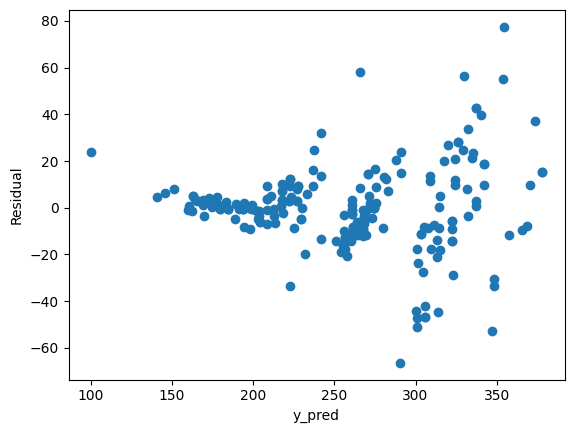

In [23]:
import matplotlib.pyplot as plot
import statsmodels.api as sm

# df ['FUELCONSUMPTION_COMB_MPG_2']= np.log(X['FUELCONSUMPTION_COMB_MPG'])


X = df[['CYLINDERS','ENGINESIZE','FUELCONSUMPTION_COMB_MPG']]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=4)
model=LinearRegression()

model.fit(X_train,y_train)
LinearRegression()
y_pred=model.predict(X_test)
residual =y_test-y_pred

plot.scatter(y_pred,residual)
plot.xlabel('y_pred')
plot.ylabel('Residual')

Remedy - WLS

                            OLS Regression Results                            
Dep. Variable:           CO2EMISSIONS   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     2698.
Date:                Sun, 31 Dec 2023   Prob (F-statistic):               0.00
Time:                        03:53:28   Log-Likelihood:                -4791.7
No. Observations:                1067   AIC:                             9591.
Df Residuals:                    1063   BIC:                             9611.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

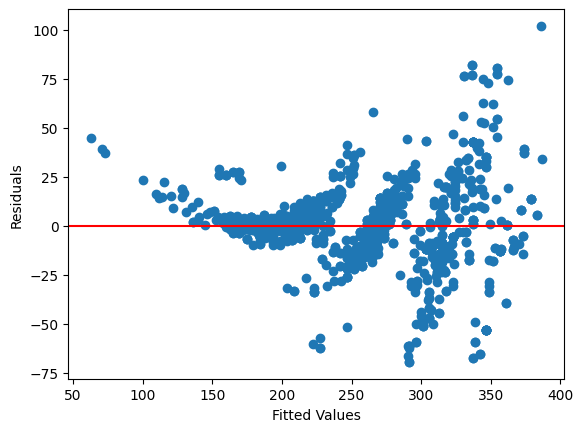

                            WLS Regression Results                            
Dep. Variable:           CO2EMISSIONS   R-squared:                       0.954
Model:                            WLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     7410.
Date:                Sun, 31 Dec 2023   Prob (F-statistic):               0.00
Time:                        03:53:28   Log-Likelihood:                -4711.1
No. Observations:                1067   AIC:                             9430.
Df Residuals:                    1063   BIC:                             9450.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [24]:
# Add constant according to statsmodels documentation
X_sm = sm.add_constant(X)

# Create model, fit, and print results
mod_sm = sm.OLS(y, X_sm)
res_sm = mod_sm.fit()
print(res_sm.summary())

plt.scatter(res_sm.fittedvalues, res_sm.resid)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.axhline(y = 0, color = 'r')
plt.show()

# Regress absolute values of residuals on fitted values
# Save the absolute values of the residuals of the OLS model
y_resid = [abs(resid) for resid in res_sm.resid]

# Add constant according to statsmodels documentation to the fitted values
# of the OLS model
X_resid = sm.add_constant(res_sm.fittedvalues)

# Create OLS model, fit, and print results
mod_resid = sm.OLS(y_resid, X_resid)
res_resid = mod_resid.fit()

# Estimate of std. dev. (sigma)
mod_fv = res_resid.fittedvalues

# Calculate weights
weights = 1 / (mod_fv**2)
weights

# Fit the weighted least squares model
model = sm.WLS(y, X_sm, weights = weights)
results = model.fit()

print(results.summary())


Residual Graph (OLS vs WLS)

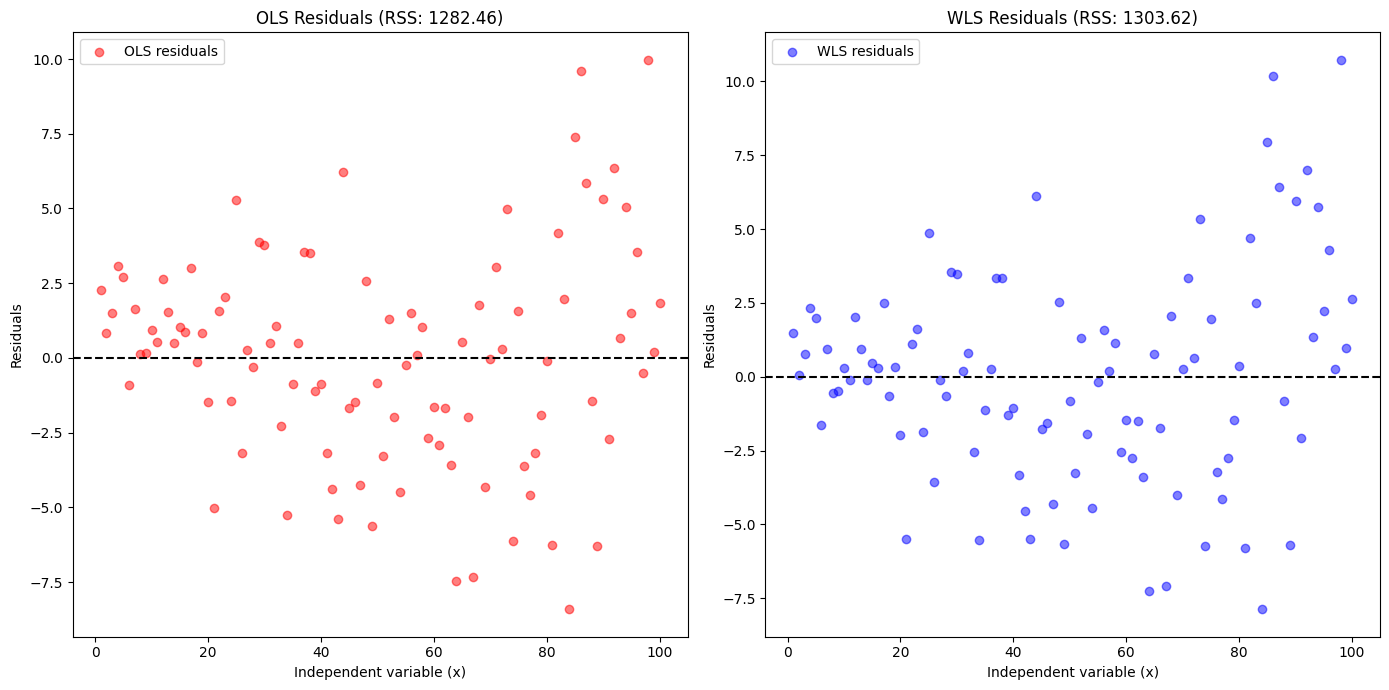

In [25]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Simulate heteroscedastic data
np.random.seed(0)
x = np.linspace(1, 100, 100)
y = 2*x + np.random.normal(scale=1 + 0.05*x, size=100)

# Assume that we know the form of the heteroscedasticity (variance growing with x)
weights = 1 / (1 + 0.05*x)

# OLS regression
ols_model = sm.OLS(y, sm.add_constant(x))
ols_result = ols_model.fit()

# WLS regression given our knowledge of the heteroscedasticity
wls_model = sm.WLS(y, sm.add_constant(x), weights=weights)
wls_result = wls_model.fit()

# Compute the residuals
ols_resid = ols_result.resid
wls_resid = wls_result.resid

# Calculate the residual sums of squares (RSS) for both models
rss_ols = sum(ols_resid**2)
rss_wls = sum(wls_resid**2)

# Plot comparing OLS residuals to WLS residuals
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.scatter(x, ols_resid, color='r', alpha=0.5, label='OLS residuals')
plt.title('OLS Residuals (RSS: {:.2f})'.format(rss_ols))
plt.xlabel('Independent variable (x)')
plt.ylabel('Residuals')
plt.axhline(y=0, color='k', linestyle='--')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(x, wls_resid, color='b', alpha=0.5, label='WLS residuals')
plt.title('WLS Residuals (RSS: {:.2f})'.format(rss_wls))
plt.xlabel('Independent variable (x)')
plt.ylabel('Residuals')
plt.axhline(y=0, color='k', linestyle='--')
plt.legend()

plt.tight_layout()
plt.show()

4) Autocorrelation:

Plot

In [ ]:
# Book Figure 11-14

import statsmodels.api as sm
from statsmodels.stats.stattools import durbin_watson
import statsmodels.api as sm
import matplotlib.pyplot as plot

plot.figure(figsize=(10,5))
p = sns.lineplot(residual,marker='o',color='blue')
plot.xlabel('y_pred/predicted values')
plot.ylabel('Residuals')
print('ljungbox stat:', sm.stats.acorr_ljungbox(residual, lags=[40], return_df=True))


Durbin Watson test

In [ ]:
dw_statistic = durbin_watson(residual)
print('Durbin-Watson stat:',dw_statistic)
if dw_statistic < 1.5:
    print("The residuals are negatively correlated.")
elif dw_statistic > 2.5:
    print("The residuals are positively correlated.")
else:
    print("The residuals are not correlated.")

Breusch Godfrey Test

In [ ]:
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.diagnostic import acorr_breusch_godfrey

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Run the Breusch-Godfrey test
bg_test = acorr_breusch_godfrey(model, nlags=1)

print('LM statistic:', bg_test[0])
print('LM test p-value:', bg_test[1])
print('f-statistic of the hypothesis that there is no serial correlation:', bg_test[2])
print('f-test p-value:', bg_test[3])

ACF

In [ ]:
from statsmodels.tsa.stattools import acf

sm.graphics.tsa.plot_acf(residual, lags=40)
plot.xlabel('Lag')
plot.ylabel('Correlation')
plot.show()


PACF

In [ ]:
from statsmodels.tsa.stattools import pacf

sm.graphics.tsa.plot_pacf(residual, lags=40)
plot.xlabel('Lag')
plot.ylabel('Correlation')
plot.show()

Remedy - GLS

In [ ]:
# Example data
np.random.seed(0)
n = 1067

# If we know / assume the structure of the covariance matrix, we can use it for GLS
# For simplicity, let's assume that variance grows with i, a common scenario in time series
omega = np.diag(np.linspace(1, 2, n))

# We need the square root of the matrix's inverse
omega_inv_sqrt = np.linalg.inv(np.sqrt(omega))

# Now we can transform our model via pre-multiplication
y_gls = np.dot(omega_inv_sqrt, y)  # Transform the dependent variable
X_gls = np.dot(omega_inv_sqrt, X)  # Transform the independent variables

# Perform GLS by fitting a new OLS model using transformed variables
model_gls = sm.OLS(y_gls, X_gls).fit()

# Display the summary of regression results
print(model_gls.summary())

# Alternatively, use GLS directly from statsmodels with the assumed covariance matrix
model_gls_direct = sm.GLS(y, X, sigma=omega).fit()

# Display the summary of regression results
print(model_gls_direct.summary())

Remedy: Newey - West

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf

model = sm.OLS.from_formula('CO2EMISSIONS ~ ENGINESIZE+CYLINDERS+FUELCONSUMPTION_COMB_MPG', data=df)
model1 = model.fit()
print(model1.summary())

reg = smf.ols('CO2EMISSIONS ~ ENGINESIZE+CYLINDERS+FUELCONSUMPTION_COMB_MPG',data=df).fit(cov_type='HAC',cov_kwds={'maxlags':1})
print (reg.summary())

# reg = smf.ols('CO2EMISSIONS ~ ENGINESIZE+CYLINDERS+FUELCONSUMPTION_COMB_MPG',data=df).fit()
# new = reg.get_robustcov_results(cov_type='HAC',maxlags=1)
# print (new.summary())